# PCA

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Read data
df1 = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/startup_data.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/cancer_reg.csv')


### Data Summary

In [ ]:
# Data dimensions of the Startup Data dataset
print("The dimensions of the Startup Data dataset are: ", df1.shape)

Dimensi dari dataset Startup Data adalah:  (949, 18)


In [ ]:
# Deskripsi setiap atribut dari dataset Startup Data
df1.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,avg_participants
count,949.000000,949.000000,885.000000,894.000000,946.000000,9.490000e+02,901.000000
mean,38.530398,-103.465916,2.322209,3.987377,2.313953,1.544590e+09,2.857545
std,3.756150,22.382011,2.941926,3.313172,1.402098,2.446676e+10,1.875341
min,25.752358,-122.756956,-9.046600,-9.046600,1.000000,-9.500000e+06,1.000000
25%,37.388869,-122.200914,0.517800,1.690375,1.000000,2.700000e+06,1.500000
50%,37.779281,-118.354605,1.424700,3.494500,2.000000,1.000000e+07,2.500000
75%,40.730646,-77.212493,3.602700,5.543150,3.000000,2.490000e+07,4.000000
max,59.335232,18.057121,34.490400,34.490400,10.000000,6.423100e+11,16.000000


In [ ]:
# Number of attributes (numerical and categorical) of the Startup Data dataset
df1.info()
print("Can be seen in dtypes below, assuming float and int are numeric, and object is categorical.")
print("Numeric: 7 columns")
print("Categroic: 11 columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_code              949 non-null    object 
 1   latitude                949 non-null    float64
 2   longitude               949 non-null    float64
 3   founded_at              949 non-null    object 
 4   age_first_funding_year  885 non-null    float64
 5   age_last_funding_year   894 non-null    float64
 6   funding_rounds          946 non-null    float64
 7   funding_total_usd       949 non-null    int64  
 8   category_code           897 non-null    object 
 9   has_VC                  949 non-null    object 
 10  has_angel               949 non-null    object 
 11  has_seriesA             949 non-null    object 
 12  has_seriesB             949 non-null    object 
 13  has_seriesC             949 non-null    object 
 14  has_seriesD             949 non-null    ob

In [ ]:
# Total of missing values
df1.isna().sum()

state_code                 0
latitude                   0
longitude                  0
founded_at                 0
age_first_funding_year    64
age_last_funding_year     55
funding_rounds             3
funding_total_usd          0
category_code             52
has_VC                     0
has_angel                  0
has_seriesA                0
has_seriesB                0
has_seriesC                0
has_seriesD                0
avg_participants          48
is_top500                  0
status                     0
dtype: int64

In [ ]:
# Number of data duplications
print("The number of duplicate data in the Startup Data dataset is: ", df1.duplicated().sum())

Jumlah duplikasi data pada dataset Startup Data adalah:  26


Terlihat pada grafik boxplot dibawah ini bahwa terdapat outlier pada seluruh kolom dengan tipe numerik.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


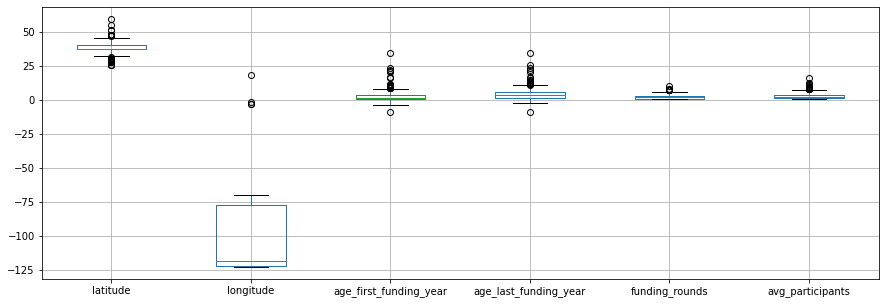

In [ ]:
# The possibility of outliers in the numerical dataset
df1.boxplot(column=['latitude','longitude','age_first_funding_year','age_last_funding_year','funding_rounds','avg_participants'], figsize=(15,5))
print("It can be seen in the boxplot graph below that there are outliers in all columns with numeric type.")

Terlihat pada grafik boxplot dibawah ini bahwa terdapat outlier pada seluruh kolom dengan tipe numerik.


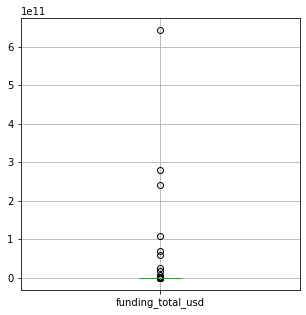

In [ ]:
# The possibility of outliers in the numerical dataset
df1.boxplot(column=['funding_total_usd'], figsize=(5,5))
print("It can be seen in the boxplot graph below that there are outliers in all columns with numeric type.")

Insight yang saya dapatkan dari heatmap dibawah ini adalah hasil korelasi antara age_first_funding_year dan age_last_funding_year memiliki hasil positif, hal ini dikarenakan nilai korelasinya 0.82, mendekati 1.


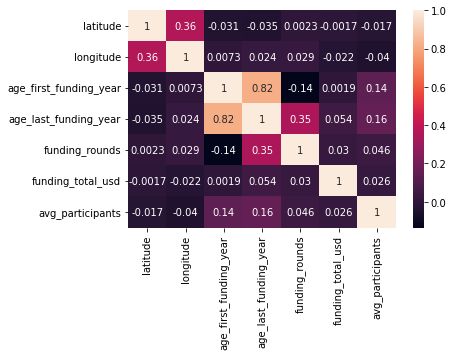

In [ ]:
# Correlation value between attributes in numerical data in the dataset
import seaborn as sns

sns.heatmap(df1.corr(method = 'pearson'), annot=True)


The insight I got from the heatmap below is that the correlation between age_first_funding_year and age_last_funding_year has positive results, this is because the correlation value is 0.82, close to 1

### Handle missing values, duplicate data, and outliers

In [ ]:
# Handling missing values
cleaned = df1.copy()
cleaned['age_first_funding_year'] = cleaned['age_first_funding_year'].fillna(cleaned['age_first_funding_year'].median())
cleaned['age_last_funding_year'] = cleaned['age_last_funding_year'].fillna(cleaned['age_last_funding_year'].median())
cleaned['avg_participants'] = cleaned['avg_participants'].fillna(cleaned['avg_participants'].median())
cleaned['funding_rounds'] = cleaned['funding_rounds'].fillna(cleaned['funding_rounds'].median())
cleaned['category_code'] = cleaned['category_code'].fillna(cleaned['category_code'].mode()[0])

In [ ]:
# Handling data duplication

cleaned.drop_duplicates(inplace=True)
cleaned.duplicated().sum()
cleaned. shape

(923, 18)

In [ ]:
def outlier_handling(column):
   globalcleaned
   clean_column = cleaned[cleaned[column].notna()]
   Q1 = net_column[column].quantile(0.25)
   Q3 = net_column[column].quantile(0.75)
   IQR = Q3 - Q1
   upperbound = Q3 + 1.5 * IQR
   lowerbound = Q1 - 1.5 * IQR

   outlier = net_column[(net_column[column] > upperbound) | (net_column[column] < lowerbound)]
   counted = outliers[column].count()
   print("The number of outliers in " + column + " is ", counted)

   # Discard rows that are outliers
   cleaned = cleaned.drop(cleaned[(cleaned[column] > upperbound) | (cleaned[column] < lowerbound)].index)

In [ ]:
data_funding_total_usd = penanganan_outlier('funding_total_usd')
data_latitude = penanganan_outlier('latitude')
data_longitude = penanganan_outlier('longitude')
data_age_first_funding_year = penanganan_outlier('age_first_funding_year')
data_age_last_funding_year = penanganan_outlier('age_last_funding_year')
data_funding_rounds = penanganan_outlier('funding_rounds')
data_avg_participants = penanganan_outlier('avg_participants')

print(cleaned.shape)

Jumlah outlier pada funding_total_usd adalah  69
Jumlah outlier pada latitude adalah  75
Jumlah outlier pada longitude adalah  0
Jumlah outlier pada age_first_funding_year adalah  26
Jumlah outlier pada age_last_funding_year adalah  10
Jumlah outlier pada funding_rounds adalah  7
Jumlah outlier pada avg_participants adalah  33
(703, 18)


I feel the need to normalize the data before PCA processing so that the attribute values have a range between 0 and 1. The form of normalization that I do is MinMax Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform split based on feature column and target column.
label = cleaned.drop(['status'], axis = 1)
X = label.select_dtypes(include = np.number)

# Min-max normalization
Minmax1 = StandardScaler().fit_transform(X)
Minmax1

array([[ 1.44339881,  1.48773125,  0.17746569, ...,  0.73937351,
        -0.93984759, -1.1457263 ],
       [-2.12384907, -0.63272845, -0.46879772, ..., -1.01072608,
        -1.16225888,  1.12252986],
       [-0.45701913, -0.85597979,  0.64617136, ...,  0.73937351,
         2.02252134,  0.61844773],
       ...,
       [ 1.49844245,  1.48135225,  2.83541256, ...,  0.73937351,
         2.91964253,  0.11444121],
       [-0.36784653, -0.8669341 , -0.61437169, ..., -0.13567628,
         0.19089891, -1.1457263 ],
       [-0.43194875, -0.85212994,  0.64032715, ..., -1.01072608,
         0.52731936,  0.36644447]])

### Visualize the dataset using t-SNE

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

x = df2.loc[:, df2.columns != 'TARGET_deathRate']
y = df2.TARGET_deathRate

# Min-max normalization
score = StandardScaler().fit_transform(x1)

tsne = TSNE(n_components = 2, verbose = 1, random_state = 123)
hasil = tsne.fit_transform(score)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3047 samples in 0.007s...
[t-SNE] Computed neighbors for 3047 samples in 0.329s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3047
[t-SNE] Computed conditional probabilities for sample 2000 / 3047
[t-SNE] Computed conditional probabilities for sample 3000 / 3047
[t-SNE] Computed conditional probabilities for sample 3047 / 3047
[t-SNE] Mean sigma: 0.624249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.670059
[t-SNE] KL divergence after 1000 iterations: 1.490925


[Text(0.5, 1.0, 'Cancer t-SNE projection')]

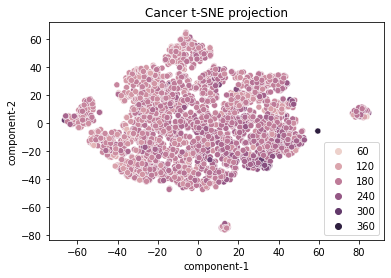

In [ ]:
cancer = pd.DataFrame()
cancer['y'] = y
cancer['component-1'] = hasil[:,0]
cancer['component-2'] = hasil[:,1]

sns.scatterplot(x = "component-1", y = "component-2", hue=cancer.y.tolist(), data=cancer).set(title="Cancer t-SNE projection")

### Manually implement step-by-step PCA on preprocessed data

In [ ]:
# Cleaning Cancer data

df2.dropna(how = "all", inplace = True)
standard = StandardScaler().fit_transform(x)

PCA involves computing the covariance matrix of the original data, finding the eigenvalues and eigenvectors of this covariance matrix, and then using these eigenvectors (principal components) to transform the original data into a new feature space with reduced dimensionality. The eigenvalues help determine the importance of each principal component and guide the selection of components to retain for dimensionality reduction.

In [ ]:
# Eigen values dan Eigen vectors dari Covariance Matrix

vector_mean = np.mean(standard, axis=0)
covariance_matrix = np.cov(standard.T)
eigenval, eigenvecs = np.linalg.eig(covariance_matrix)

print("Covariance: ", covariance_matrix)
print("Eigen Values: ", eigenval)
print("Eigen Vectors: ", eigenvecs)

Covariance:  [[ 1.0003283   0.93971619  0.07357732  0.26923304  0.92719784 -0.13573846
   0.08209832 -0.02410542 -0.12500964 -0.12288443  0.06480906 -0.10614255
  -0.03451896]
 [ 0.93971619  1.0003283   0.06271044  0.22328004  0.97795501 -0.06693991
   0.06350917 -0.0246068  -0.14853595 -0.14411651  0.08618976 -0.18108854
  -0.07444445]
 [ 0.07357732  0.06271044  1.0003283  -0.00103653  0.02692119  0.00904922
   0.077308    0.01809511 -0.01473807 -0.00910855 -0.11843884 -0.11956372
  -0.11822009]
 [ 0.26923304  0.22328004 -0.00103653  1.0003283   0.23560018 -0.78922426
   0.04401721 -0.01329211 -0.09169273 -0.15332872  0.1121021   0.35523945
  -0.0101979 ]
 [ 0.92719784  0.97795501  0.02692119  0.23560018  1.0003283  -0.06532059
   0.05573981 -0.02522727 -0.17666562 -0.17799074  0.10997654 -0.16051596
  -0.05775913]
 [-0.13573846 -0.06693991  0.00904922 -0.78922426 -0.06532059  1.0003283
  -0.05567062 -0.02928961 -0.21407131 -0.14821218  0.074332   -0.64306792
  -0.01228654]
 [ 0.08209

Sort the eigen values from largest to smallest in order to store the eigenvector that corresponds to the eigenvalue

In [ ]:
# Create a list of (eigenvalue, eigenvector) tuples
pairs = [(np. abs(eigenval[i]), eigenvecs[:,i]) for i in range(len(eigenval))]

pairs.sort()
pairs.reverse()

# pairs[0] will store eigen_values from largest to smallest in order

#### Get the number of main components 

The array of cumulative percentage information is essential for making informed decisions about the number of principal components to retain in PCA, understanding the trade-offs involved in dimensionality reduction, and interpreting and visualizing the results of the analysis.

Array dari kumulatif persentase informasi: 
1 0.25083479130086306
2 0.44731925216817303
3 0.5854068517923707
4 0.6742942592790853
5 0.751459564333744
6 0.8265662736951851
7 0.8940648261720398
8 0.9499457772595652
9 0.9783326545481613
10 0.9879181913182613
11 0.9937927242856576
12 0.9985059581298029
13 0.9999999999999999


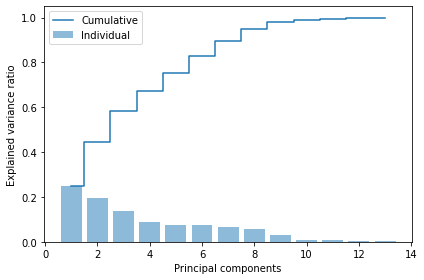

In [ ]:
tot = sum(np.abs(eigenval))
var_exp = [(i / tot) for i in sorted(np.abs(eigenval), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("Array of cumulative percentage information: ")
for i in range(1, len(cum_var_exp) + 1):
    print(i, cum_var_exp[i - 1])

plt.bar(range(1, eigenval.size + 1), var_exp, alpha=0.5, align='center', label='Individual')
plt.step(range(1, eigenval.size + 1), cum_var_exp, where='mid', label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./fig-pca-var-exp.png', dpi=300)
plt.show()

#### Get the projection matrix W from the number of components that have been selected

In [ ]:
# k number of components taken
k = 12
lst = []
for i in range(k):
     lst.append(pairs[i][1].reshape(13,1))

matrix = np.hstack(lst)
print('Matrix: ', matrix)

Matriks:  [[-4.84153957e-01 -1.99030506e-01 -1.94266502e-01 -8.87748893e-02
   5.18776410e-02  1.03698021e-02  5.26222151e-02 -1.59221598e-02
  -6.21965107e-02  8.37789383e-02  7.96162881e-01  1.46153199e-01]
 [-4.98335836e-01 -1.59992698e-01 -2.27381633e-01 -1.00965702e-01
   1.91353007e-02 -6.22537615e-03  1.87455886e-02 -1.56353177e-02
  -3.54278581e-02  1.85219841e-02 -3.18392459e-01 -7.05985958e-02]
 [-4.22909081e-02  7.88841446e-03 -1.56538315e-01  6.80723665e-01
  -7.38414033e-02  1.38462694e-01  5.14696294e-01 -4.64033576e-01
  -6.06404634e-02 -2.20389743e-02 -2.90132402e-02 -9.46151459e-03]
 [-1.77064142e-01 -3.70050828e-01  4.43913037e-01  1.92086305e-01
  -1.45164091e-01 -3.16187943e-02 -2.04276817e-02  9.73159356e-02
   4.61173099e-01 -5.90803477e-01  4.95691154e-02 -3.18142615e-02]
 [-5.01947908e-01 -1.53307621e-01 -1.97433981e-01 -1.29022513e-01
   1.64710832e-02 -5.86061490e-03  9.13409661e-03 -3.82066032e-03
  -8.38504579e-02 -7.65727764e-02 -4.68799086e-01 -7.14802098e

#### Transform the initial dataset X through W to obtain a K-dimensional matrix

The feature matrix is also compared with the existing label matrix

In [ ]:
Y = standard.dot(matrix)
columns = []
for i in range(k):
    columns.append("Component " + str(i + 1))

PCA_dataframe = pd.DataFrame(data = Y , columns = columns)
final_dataframe = pd.concat([PCA_dataframe, pd.DataFrame(label)], axis = 1)
final_dataframe


,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500
0,-1.272969,-0.962648,0.783919,0.910593,0.346681,0.278759,0.267104,-0.185280,0.352201,-0.058801,0.031742,-0.335394,CA,42.358880,-71.056820,1/1/2007,2.2493,3.0027,3.0,375000.0,music,No,Yes,No,No,No,No,1.0000,No
1,-0.645690,1.767102,0.853674,0.366365,-0.570973,-0.560081,-0.303089,1.363508,0.033901,0.117690,-0.034244,0.161154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.914983,-0.815983,0.053672,-1.003524,-0.482592,-0.670117,-1.653718,0.321702,0.197479,0.040984,-0.040691,0.082023,CA,32.901049,-117.192656,3/18/2009,1.0329,1.0329,1.0,-2600000.0,web,No,No,Yes,No,No,No,4.0000,Yes
3,0.329541,-0.211104,-0.361106,-0.010761,0.104161,-0.140272,-0.734228,-0.079297,-0.134727,0.030928,-0.093494,0.169333,CA,37.320309,-122.050040,1/1/2002,3.1315,5.3151,3.0,40000000.0,software,No,No,No,Yes,Yes,Yes,3.3333,Yes
4,1.573168,-1.775426,-0.003357,-1.718479,0.368797,-0.250255,-0.550376,0.383960,0.467722,0.021078,-0.142716,0.182003,CA,37.779281,-122.419236,8/1/2010,1.4247,1.6685,2.0,1300000.0,games_video,Yes,Yes,No,No,No,No,1.0000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0.450092,-1.066571,-0.495387,-0.386010,0.568650,0.108254,1.082433,0.309106,0.719120,0.576549,0.991861,-0.431351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3043,-1.547319,1.645514,2.055492,-0.112352,0.720383,0.513478,0.643203,-0.111708,-0.720448,-0.015457,0.967954,0.171210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3044,-1.719855,1.030111,2.458011,1.133331,2.626235,1.549678,-1.028364,-0.240884,-0.912899,0.117983,0.859344,0.328810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3045,-0.332224,-0.579067,1.100166,-0.415523,0.290437,0.129139,0.874850,-0.193051,-0.563879,0.132425,0.934710,-0.038739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PCA with Scikitlearn

[Text(0.5, 1.0, 'Cancer PCA projection')]

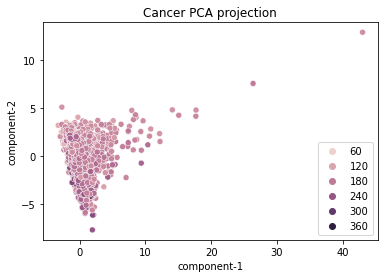

In [ ]:
# transformation results with a scatter plot

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
skl_pca = pca.fit_transform(standard)

cancer2 = pd.DataFrame()
cancer2["y"] = y
cancer2["component-1"] = skl_pca[:,0]
cancer2["component-2"] = skl_pca[:,1]

sns.scatterplot(x = "component-1", y = "component-2", hue = cancer2.y.tolist(), data = cancer2).set(title = "Cancer PCA projection")

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components = 12)

pca_library = pca.fit_transform(standard)
print("Eigen Value : ")
print(pca.explained_variance_)

pca_library_dataframe = pd.DataFrame(data = pca_library , columns = columns)
library_final_dataframe = pd.concat([pca_library_dataframe, pd.DataFrame(label)], axis = 1)
library_final_dataframe

Eigen Value : 
[3.26192282 2.55513657 1.79572814 1.15591566 1.0034783  0.97670777
 0.87776926 0.72669086 0.36915056 0.12465289 0.076394   0.06129216]


,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500
0,1.272969,0.962648,-0.783919,0.910593,0.346681,0.278759,-0.267104,0.185280,-0.352201,0.058801,-0.031742,0.335394,CA,42.358880,-71.056820,1/1/2007,2.2493,3.0027,3.0,375000.0,music,No,Yes,No,No,No,No,1.0000,No
1,0.645690,-1.767102,-0.853674,0.366365,-0.570973,-0.560081,0.303089,-1.363508,-0.033901,-0.117690,0.034244,-0.161154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.914983,0.815983,-0.053672,-1.003524,-0.482592,-0.670117,1.653718,-0.321702,-0.197479,-0.040984,0.040691,-0.082023,CA,32.901049,-117.192656,3/18/2009,1.0329,1.0329,1.0,-2600000.0,web,No,No,Yes,No,No,No,4.0000,Yes
3,-0.329541,0.211104,0.361106,-0.010761,0.104161,-0.140272,0.734228,0.079297,0.134727,-0.030928,0.093494,-0.169333,CA,37.320309,-122.050040,1/1/2002,3.1315,5.3151,3.0,40000000.0,software,No,No,No,Yes,Yes,Yes,3.3333,Yes
4,-1.573168,1.775426,0.003357,-1.718479,0.368797,-0.250255,0.550376,-0.383960,-0.467722,-0.021078,0.142716,-0.182003,CA,37.779281,-122.419236,8/1/2010,1.4247,1.6685,2.0,1300000.0,games_video,Yes,Yes,No,No,No,No,1.0000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-0.450092,1.066571,0.495387,-0.386010,0.568650,0.108254,-1.082433,-0.309106,-0.719120,-0.576549,-0.991861,0.431351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3043,1.547319,-1.645514,-2.055492,-0.112352,0.720383,0.513478,-0.643203,0.111708,0.720448,0.015457,-0.967954,-0.171210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3044,1.719855,-1.030111,-2.458011,1.133331,2.626235,1.549678,1.028364,0.240884,0.912899,-0.117983,-0.859344,-0.328810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3045,0.332224,0.579067,-1.100166,-0.415523,0.290437,0.129139,-0.874850,0.193051,0.563879,-0.132425,-0.934710,0.038739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Differences

The results I got were differences in data visualization and representation. With tSNE, is one way to apply the reduction method. Meanwhile the use of PCA maintains the global data framework. From the dataset I have, tSNE is proven to be better because it maintains a local data frame.

From the difference in PCA calculations; sklearn and manual, it can be seen that these two calculations do not affect the dataset that I have, because the resulting values remain the same.